# PART 1

In [299]:
#creating a list of 100,000 names, no duplicates in the name
import numpy as np
import time
import random
import string
np.random.seed()
stringarray = [''.join(random.sample(string.ascii_letters, k = 10)) for _ in range(100000)]
#store the names in a set
copyarr = stringarray.copy()
s = set(stringarray)

#use quicksort
def quicksort(array):
    if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all the elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all the elements greater than the pivot
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

a = time.perf_counter()
#copy new unsorted array to sort
sortedquickarray = quicksort(copyarr)
b = time.perf_counter()
stringquicksort = (b - a) * 1000

#time of quicksort(in ms)
stringquicksort


364.9679780000952

# PART 2

In [300]:
names = []
index = [10000-1, 30000-1, 50000-1, 70000-1, 90000-1, len(stringarray)-1]
for i in index:
    names.append(stringarray[i])

In [301]:
names

['kgmnWoFtlV',
 'dhtRAJYXeF',
 'kyDVcNaYFt',
 'qrFQBsLgGJ',
 'OJHxRnaeFT',
 'iWRSGqsOYz']

In [302]:
#used algorithm from https://github.com/egonSchiele/grokking_algorithms/tree/master/01_introduction_to_algorithms
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1
 # While you haven't narrowed it down to one element ...
    while low <= high:
    # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
    # Found the item.
        if guess == item:
            return mid
    # The guess was too high.
        if guess > item:
            high = mid - 1
    # The guess was too low.
        else:
            low = mid + 1

  # Item doesn't exist
    return None

In [303]:
#linearsearch
#source: https://www.geeksforgeeks.org/linear-search/
def linearsearch(array, x):
    for i in range(0, len(array)):
        if array[i] == x:
            return i
    return None

# Part 3

In [311]:
#using linear search on unsorted array
timelinsearch = []
for n in names:
    a = time.perf_counter()
    linearsearch(stringarray, n)
    b = time.perf_counter()
    timelinsearch.append((b - a) * 1000)

In [318]:
#using binary search on sorted array, save index
timebinsearch = []
for n in names:
    a = time.perf_counter()
    binary_search(sortedquickarray, n)
    b = time.perf_counter()
    timebinsearch.append((b - a) * 1000)

In [342]:
#using set operations
timesetsearch = []
for n in names:
    a = time.perf_counter()
    n in s
    b = time.perf_counter()
    timesetsearch.append((b - a) * 1000)

# Part 4

In [343]:
#put in dataframe
import pandas as pd
searchtimes = {"names": names, "bin search time":timebinsearch , "lin search times": timelinsearch , "set search times": timesetsearch}
searchtimedf = pd.DataFrame(searchtimes)
searchtimedf

,names,bin search time,lin search times,set search times
0,kgmnWoFtlV,0.013649,0.867986,0.001382
1,dhtRAJYXeF,0.008623,2.125488,0.000490
2,kyDVcNaYFt,0.006938,4.043590,0.000413
3,qrFQBsLgGJ,0.007253,4.752273,0.000388
4,OJHxRnaeFT,0.007148,5.855889,0.000408
5,iWRSGqsOYz,0.007282,6.888165,0.000507


Text(0.5, 1.0, 'names to linear search time')

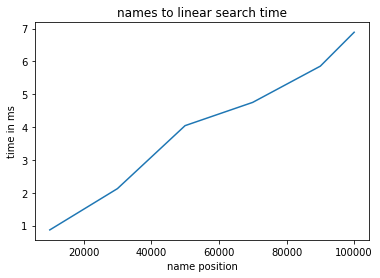

In [344]:
import matplotlib.pyplot as plt
plt.xlabel('name position')
plt.ylabel('time in ms')
plt.plot(index, timelinsearch)
plt.title('names to linear search time')

Text(0.5, 1.0, 'names to binary search time')

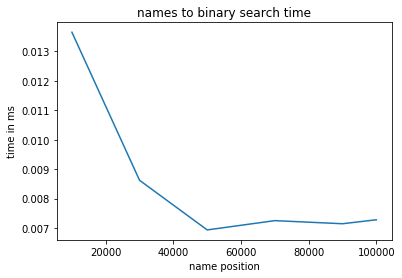

In [345]:
plt.xlabel('name position')
plt.ylabel('time in ms')
plt.plot(index, timebinsearch)
plt.title('names to binary search time')

Text(0.5, 1.0, 'names to set search time')

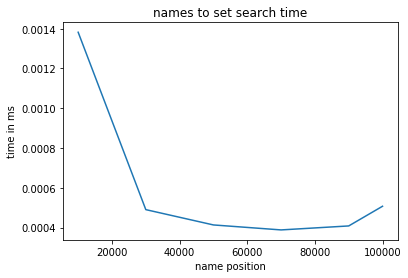

In [346]:
plt.xlabel('name position')
plt.ylabel('time in ms')
plt.plot(index, timesetsearch)
plt.title('names to set search time')

Text(0.5, 1.0, 'names to bin/lin search time')

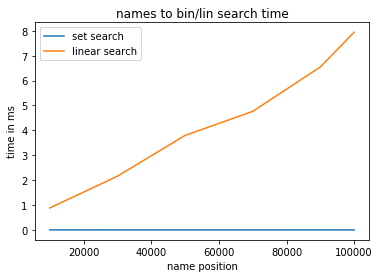

In [242]:
#compare both set search and linear search
plt.xlabel('name position')
plt.ylabel('time in ms')
plt.plot(index, timesetsearch)
plt.plot(index, timelinsearch)
plt.legend(['set search', 'linear search'])
plt.title('names to bin/lin search time')

Text(0.5, 1.0, 'names to bin/set search time')

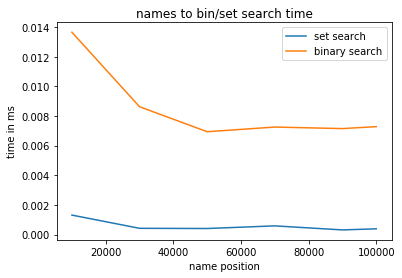

In [320]:
#compare both set search and binary search
plt.xlabel('name position')
plt.ylabel('time in ms')
plt.plot(index, timesetsearch)
plt.plot(index, timebinsearch)
plt.legend(['set search', 'binary search'])
plt.title('names to bin/set search time')

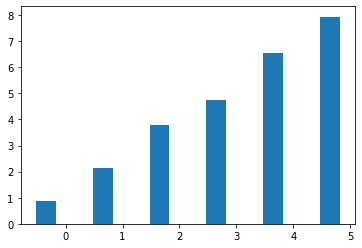

In [244]:
ind = np.arange(len(index))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bar1 = ax.bar(ind - width, timelinsearch, width, label='Linear search')

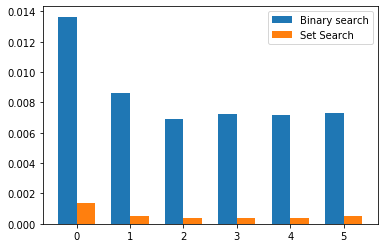

In [347]:
ind = np.arange(len(index))  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
bar1 = ax.bar(ind - width/2, timebinsearch, width, label='Binary search')
bar2 = ax.bar(ind + width/2, timesetsearch, width, label='Set Search')
ax.legend()

# Summary

In this exploration, I explored runtime of binary search vs linear search, and set lookup operation. I first started out by creating the array with 100,000 names of length 10. I later used quick sort and made a copy of the array. I got a time of 364 milliseconds. I used quick sort because it is an algorithm that divides the algorithm into arrays by organizing the array by a pivot. I thought this made logical sense to use because it is easier to sort the an array if you divide it into tiny chunks by putting and seeing where it fits compared to a specific number. I then converted the array copy to a set as well. I then used the linear search and binary search algorithms and set lookup operations.

From my results from looking at each algorithm first is Linear Search is consistent with O(N) as the main implies. In the Binary Search algorithm, search algorithm starts out pretty slow, but through finding each middle element of, the running time gets more consistent to log(N). In the set lookup operation the same thing happens, but after looking up the first element the algorithm gets more consistent with O(1). When I compare linear and binary search you can see that the linear is so much slower than binary search which is consistent. When looking at set search, and binary search set seatch is consistent with a faster running time compared to binary search. From the bar graphs how much more the time complexity for the binary search compares to set lookup. Since Set Lookup has an underlying hashing type storage, it is close to constant on average.